# Car Accident Srverity

# Introduction:


Background:

Road Accident is the most undesirable and unexpected thing to occur to a road user, though they happen quite often. Unfortunately, we can see a minatory rise of road accidents , conspicuously highroad accidents over the past few years. It has a massive impact on society as well as in the economy of our country as there is an immense cost of fatalities and injuries.

Problem:

In an effort to reduce the frequency of car collisions in a community, an algorithm must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.


# Importing Modules and Dataset

In [29]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
df=pd.read_csv("Data-Collisions.csv")

C:\Users\91891\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Understanding:

Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND’, 'LIGHTCOND',’ The total number of people involved in the collision’ and’ The number of vehicles involved in the collision. 

In [4]:
df.shape

(194673, 38)

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df[["WEATHER","ROADCOND","LIGHTCOND","PERSONCOUNT","VEHCOUNT","SEVERITYCODE"]]

,WEATHER,ROADCOND,LIGHTCOND,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,Overcast,Wet,Daylight,2,2,2
1,Raining,Wet,Dark - Street Lights On,2,2,1
2,Overcast,Dry,Daylight,4,3,1
3,Clear,Dry,Daylight,3,3,1
4,Raining,Wet,Daylight,2,2,2
...,...,...,...,...,...,...
194668,Clear,Dry,Daylight,3,2,2
194669,Raining,Wet,Daylight,2,2,1
194670,Clear,Dry,Daylight,3,2,2
194671,Clear,Dry,Dusk,2,1,2


In [7]:
df["WEATHER"].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


# Missing values and Encoding

In Pandas missing data is represented by two value:

•	None: None is a Python singleton object that is often used for missing data in Python code.

•	Nan : Nan (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.


We must use label encoding to covert the features to our desired data type. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [46]:
df["WEATHER"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
194668    False
194669    False
194670    False
194671    False
194672    False
Name: WEATHER, Length: 194673, dtype: bool

In [9]:
df["WEATHER"].describe(include="all")

count     189592
unique        11
top        Clear
freq      111135
Name: WEATHER, dtype: object

In [10]:
df["WEATHER"].replace([np.nan,"Unknown"],"Clear",inplace=True)

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["WEATHER"]=le.fit_transform(df["WEATHER"])
df["WEATHER"]

0         4
1         6
2         4
3         1
4         6
         ..
194668    1
194669    6
194670    1
194671    1
194672    1
Name: WEATHER, Length: 194673, dtype: int32

In [12]:
df["ROADCOND"].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [13]:
sum(df["ROADCOND"].isnull())

5012

In [14]:
df["ROADCOND"].describe(include="all")

count     189661
unique         9
top          Dry
freq      124510
Name: ROADCOND, dtype: object

In [15]:
df["ROADCOND"].replace([np.nan,"Unknown"],"Dry",inplace=True)

In [16]:
df["ROADCOND"]=le.fit_transform(df["ROADCOND"])
df["ROADCOND"]

0         7
1         7
2         0
3         0
4         7
         ..
194668    0
194669    7
194670    0
194671    0
194672    7
Name: ROADCOND, Length: 194673, dtype: int32

In [17]:
df["LIGHTCOND"].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [18]:
sum(df["LIGHTCOND"].isnull())

5170

In [19]:
df["LIGHTCOND"].describe(include="all")

count       189503
unique           9
top       Daylight
freq        116137
Name: LIGHTCOND, dtype: object

In [20]:
df["LIGHTCOND"].replace([np.nan,"Unknown"],"Daylight",inplace=True)
df["LIGHTCOND"]=le.fit_transform(df["LIGHTCOND"])
df["LIGHTCOND"]

0         5
1         2
2         5
3         5
4         5
         ..
194668    5
194669    5
194670    5
194671    6
194672    5
Name: LIGHTCOND, Length: 194673, dtype: int32

In [21]:
print(sum(df["WEATHER"].isnull()))
print(sum(df["ROADCOND"].isnull()))
print(sum(df["LIGHTCOND"].isnull()))

0
0
0


In [22]:
df["SEVERITYCODE"].describe(include="all")

count    194673.000000
mean          1.298901
std           0.457778
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: SEVERITYCODE, dtype: float64

# Feature Scaling:

In [23]:
x=df[["WEATHER","ROADCOND","LIGHTCOND","PERSONCOUNT","VEHCOUNT"]]

In [24]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

In [25]:
y=df[["SEVERITYCODE"]]

# Training Data and Test Data:

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [47]:
print("Train Set:",x_train.shape,y_train.shape)
print("Test Set:",x_test.shape,y_test.shape)

Train Set: (155738, 5) (155738, 1)
Test Set: (38935, 5) (38935, 1)


# Predictive Modelling:

# K-nearest neighbours (KNN):

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
a=[]
for i in range(1,31):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_hat=knn.predict(x_test)
    a.append(metrics.accuracy_score(y_test,y_hat))

C:\Users\91891\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91891\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91891\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91891\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\91891\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

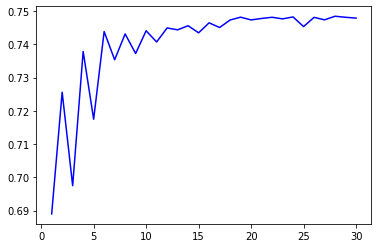

In [32]:
plt.plot(range(1,31),a,color="blue")

In [48]:
knn1=KNeighborsClassifier(30)
knn1.fit(x_train,y_train)

C:\Users\91891\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [49]:
print("KNN accuracy_score",metrics.accuracy_score(y_test,knn1.predict(x_test)))

KNN accuracy_score 0.7478618209836908


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat,labels=[1,2]))

[[26263  1140]
 [ 8677  2855]]


# Decision Tree:

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy",max_depth=7)
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
y_hat2=tree.predict(x_test)
print("decision tree accuracy",metrics.accuracy_score(y_test,y_hat2))

decision tree accuracy 0.7505072556825478


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat2,labels=[1,2]))

[[26338  1065]
 [ 8648  2884]]


# Logistic Regression:

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01,solver="liblinear")

In [38]:
lr.fit(x_train,y_train)

C:\Users\91891\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_hat3=lr.predict(x_test)
print("logistic regression accuracy",metrics.accuracy_score(y_test,y_hat3))

logistic regression accuracy 0.7025812251187877


In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat3,labels=[1,2]))

[[26807   596]
 [10984   548]]


# Support vector machines(SVM)

In [43]:
from sklearn import svm
svm_model=svm.SVC()

In [44]:
svm_model.fit(x_train,y_train)

C:\Users\91891\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
y_hat4=svm_model.predict(x_test)
print("SVM accuracy",metrics.accuracy_score(y_test,y_hat4))

SVM accuracy 0.7510979838191858


In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat4,labels=[1,2]))

[[26396  1007]
 [ 8684  2848]]


# Results and Evaluations

In [66]:
results=pd.DataFrame({"Algorithm":["KNN","Decision Tree","SVM","LogisticRegression"]})
results

,Algorithm
0,KNN
1,Decision Tree
2,SVM
3,LogisticRegression


In [67]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [68]:
results["jaccard"]=[str(jaccard_similarity_score(y_test,y_hat)),str(jaccard_similarity_score(y_test,y_hat2)),
                    str(jaccard_similarity_score(y_test,y_hat3)),str(jaccard_similarity_score(y_test,y_hat))]
results["F1-score"]=[str(f1_score(y_test,y_hat,average='weighted')),str(f1_score(y_test,y_hat2,average='weighted')),
                     str(f1_score(y_test,y_hat3,average='weighted')),str(f1_score(y_test,y_hat4,average='weighted'))]
results["accuracy_score"]=[str(metrics.accuracy_score(y_test,y_hat)),str(metrics.accuracy_score(y_test,y_hat2)),
                           str(metrics.accuracy_score(y_test,y_hat3)),str(metrics.accuracy_score(y_test,y_hat4))]
results

C:\Users\91891\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,Algorithm,jaccard,F1-score,accuracy_score
0,KNN,0.7478618209836908,0.7019075177197703,0.7478618209836908
1,Decision Tree,0.7505072556825478,0.7045756130521309,0.7505072556825478
2,SVM,0.7025812251187877,0.6044089974566248,0.7025812251187877
3,LogisticRegression,0.7478618209836908,0.7042966580979844,0.7510979838191858
